# Bank Nifty Price Prediction - Top 5

In [1]:
!pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36081 sha256=f5796b7d0305ff77f0445a2cd567d510a4331a715e755674a27824abd4293c9c
  Stored in directory: c:\users\prince\appdata\local\pip\cache\wheels\50\12\d5\bbea58569f0c28fa7a6cb72cc76303ecd20d40c977742486df
Successfully built nsepy


In [2]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## IDFC

In [16]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2019,12,31)
stk_data = gh(symbol='IDFCFIRSTB',start=start,end=end)

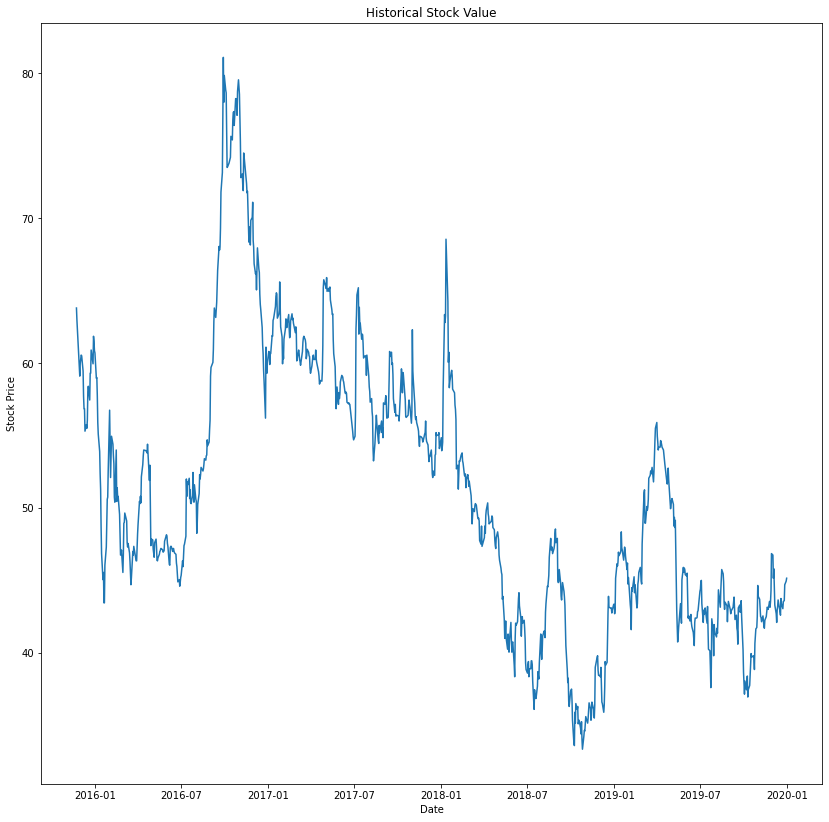

In [17]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [18]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [21]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1000):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [22]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [27]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train,  epochs = 35, batch_size = 32)

Epoch 1/35
30/30 [==============================] - 9s 58ms/step - loss: 0.0021
Epoch 2/35
30/30 [==============================] - 2s 58ms/step - loss: 0.0021
Epoch 3/35
30/30 [==============================] - 2s 59ms/step - loss: 0.0019
Epoch 4/35
30/30 [==============================] - 2s 63ms/step - loss: 0.0021
Epoch 5/35
30/30 [==============================] - 2s 57ms/step - loss: 0.0024
Epoch 6/35
30/30 [==============================] - 2s 57ms/step - loss: 0.0017
Epoch 7/35
30/30 [==============================] - 2s 57ms/step - loss: 0.0017
Epoch 8/35
30/30 [==============================] - 2s 63ms/step - loss: 0.0019
Epoch 9/35
30/30 [==============================] - 2s 58ms/step - loss: 0.0020
Epoch 10/35
30/30 [==============================] - 2s 61ms/step - loss: 0.0017
Epoch 11/35
30/30 [==============================] - 2s 61ms/step - loss: 0.0016
Epoch 12/35
30/30 [==============================] - 2s 64ms/step - loss: 0.0016
Epoch 13/35
30/30 [==================

In [28]:
testdataframe= gh(symbol='IDFCFIRSTB',start=dt.datetime(2020,1,1),end=dt.datetime(2022,7,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [29]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

6/6 [==============================] - 2s 22ms/step


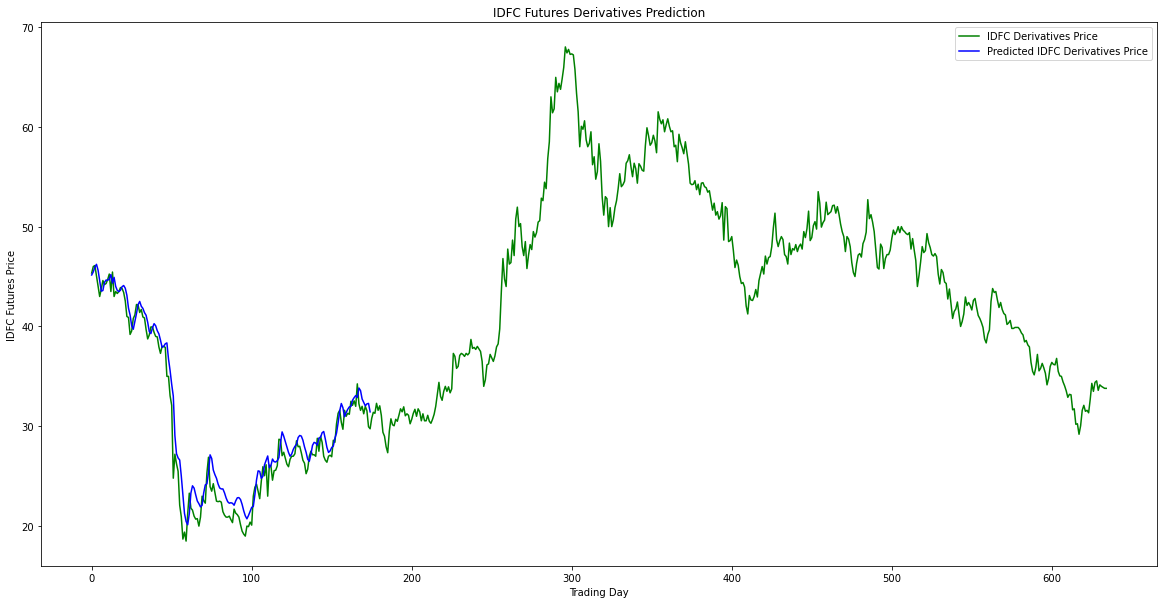

In [34]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'IDFC Derivatives Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted IDFC Derivatives Price')
plt.title('IDFC Futures Derivatives Prediction')
plt.xlabel('Trading Day')
plt.ylabel('IDFC Futures Price')
plt.legend()
plt.show()

## HDFCBANK

In [32]:
start = dt.datetime(2012,1,1)
end = dt.datetime(2019,12,31)
stk_data = gh(symbol='HDFCBANK',start=start,end=end)

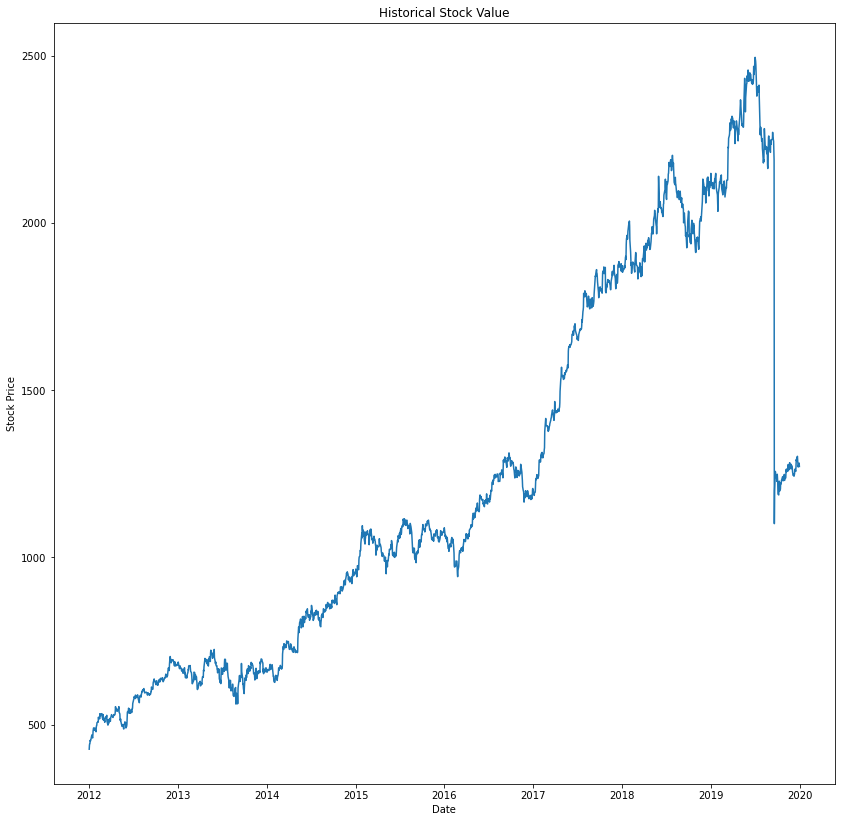

In [33]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [35]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [37]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1600):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [38]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [46]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 55, batch_size = 32)

Epoch 1/55
49/49 [==============================] - 12s 58ms/step - loss: 8.4973e-04
Epoch 2/55
49/49 [==============================] - 3s 56ms/step - loss: 9.4495e-04
Epoch 3/55
49/49 [==============================] - 3s 56ms/step - loss: 8.6109e-04
Epoch 4/55
49/49 [==============================] - 3s 57ms/step - loss: 8.0982e-04
Epoch 5/55
49/49 [==============================] - 3s 59ms/step - loss: 8.7379e-04
Epoch 6/55
49/49 [==============================] - 3s 58ms/step - loss: 8.1376e-04
Epoch 7/55
49/49 [==============================] - 3s 59ms/step - loss: 7.4270e-04
Epoch 8/55
49/49 [==============================] - 3s 56ms/step - loss: 6.8561e-04
Epoch 9/55
49/49 [==============================] - 3s 56ms/step - loss: 6.8449e-04
Epoch 10/55
49/49 [==============================] - 3s 57ms/step - loss: 6.4093e-04
Epoch 11/55
49/49 [==============================] - 3s 57ms/step - loss: 6.8147e-04
Epoch 12/55
49/49 [==============================] - 3s 60ms/step - loss:

In [47]:
testdataframe= gh(symbol='HDFCBANK',start=dt.datetime(2020,1,1),end=dt.datetime(2022,7,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 400):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [48]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

11/11 [==============================] - 2s 22ms/step


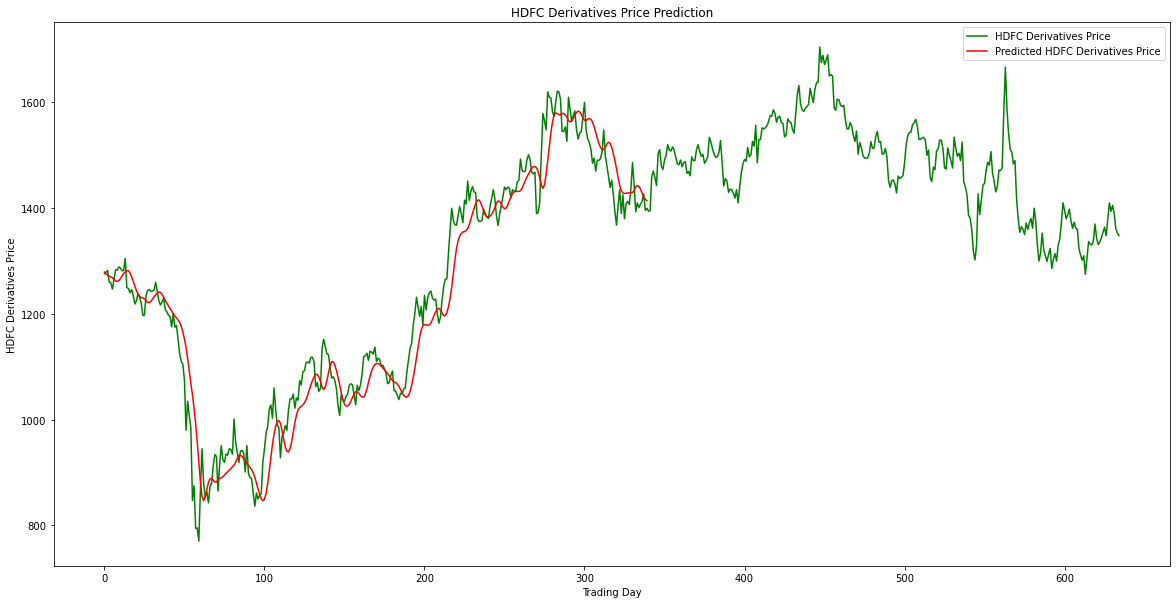

In [49]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'HDFC Derivatives Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted HDFC Derivatives Price')
plt.title('HDFC Derivatives Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('HDFC Derivatives Price')
plt.legend()
plt.show()

## AXISBANK

In [54]:
start = dt.datetime(2015,1,1)
end = dt.datetime(2019,12,31)
stk_data = gh(symbol='AXISBANK',start=start,end=end)

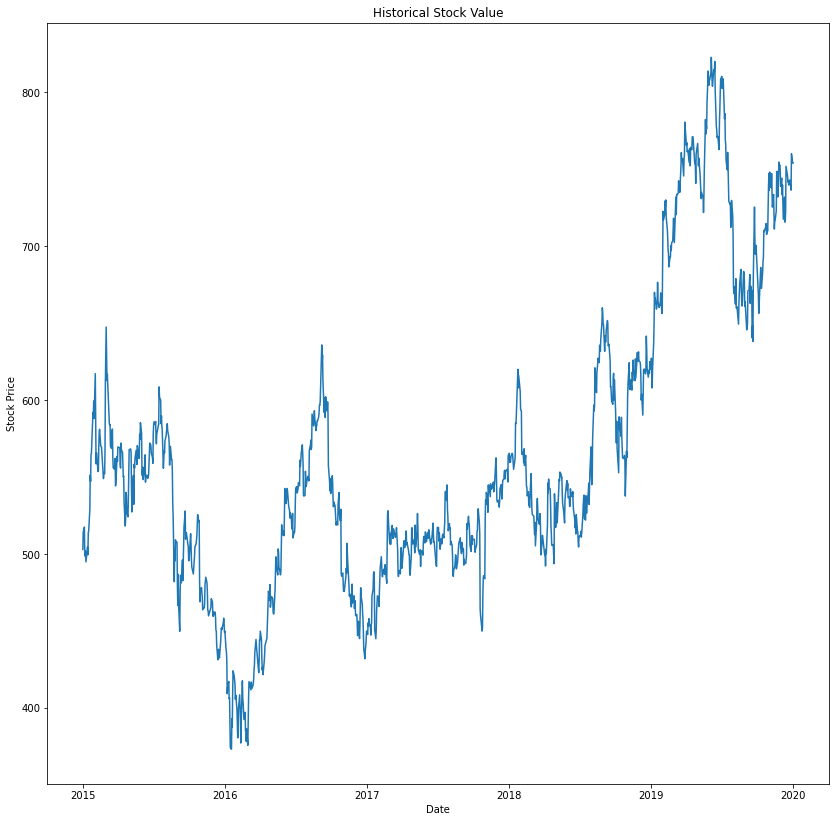

In [55]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [56]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [58]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1200):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [59]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [60]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 70, batch_size = 32)

Epoch 1/70
36/36 [==============================] - 10s 57ms/step - loss: 0.0312
Epoch 2/70
36/36 [==============================] - 2s 57ms/step - loss: 0.0081
Epoch 3/70
36/36 [==============================] - 2s 57ms/step - loss: 0.0066
Epoch 4/70
36/36 [==============================] - 2s 59ms/step - loss: 0.0069
Epoch 5/70
36/36 [==============================] - 2s 59ms/step - loss: 0.0057
Epoch 6/70
36/36 [==============================] - 2s 60ms/step - loss: 0.0054
Epoch 7/70
36/36 [==============================] - 2s 56ms/step - loss: 0.0051
Epoch 8/70
36/36 [==============================] - 2s 58ms/step - loss: 0.0045
Epoch 9/70
36/36 [==============================] - 2s 57ms/step - loss: 0.0049
Epoch 10/70
36/36 [==============================] - 2s 57ms/step - loss: 0.0050
Epoch 11/70
36/36 [==============================] - 2s 59ms/step - loss: 0.0040
Epoch 12/70
36/36 [==============================] - 2s 59ms/step - loss: 0.0049
Epoch 13/70
36/36 [=================

In [61]:
testdataframe= gh(symbol='AXISBANK',start=dt.datetime(2020,1,1),end=dt.datetime(2022,7,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 400):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [62]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

11/11 [==============================] - 2s 24ms/step


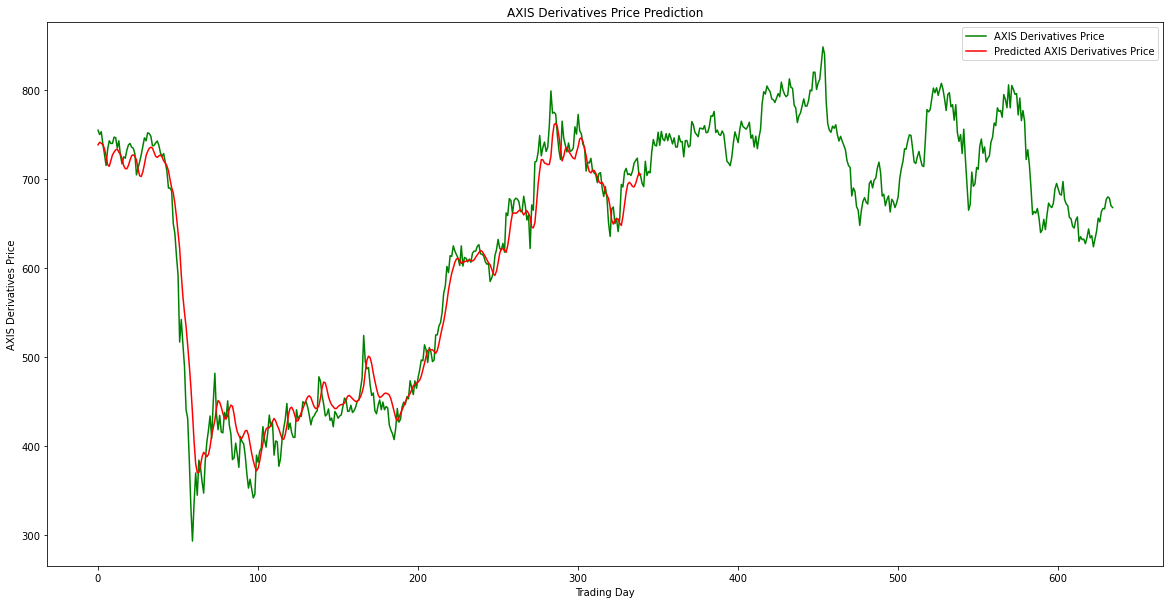

In [63]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'AXIS Derivatives Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted AXIS Derivatives Price')
plt.title('AXIS Derivatives Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('AXIS Derivatives Price')
plt.legend()
plt.show()

## INDUSINDBK

In [64]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2019,12,31)
stk_data = gh(symbol='INDUSINDBK',start=start,end=end)

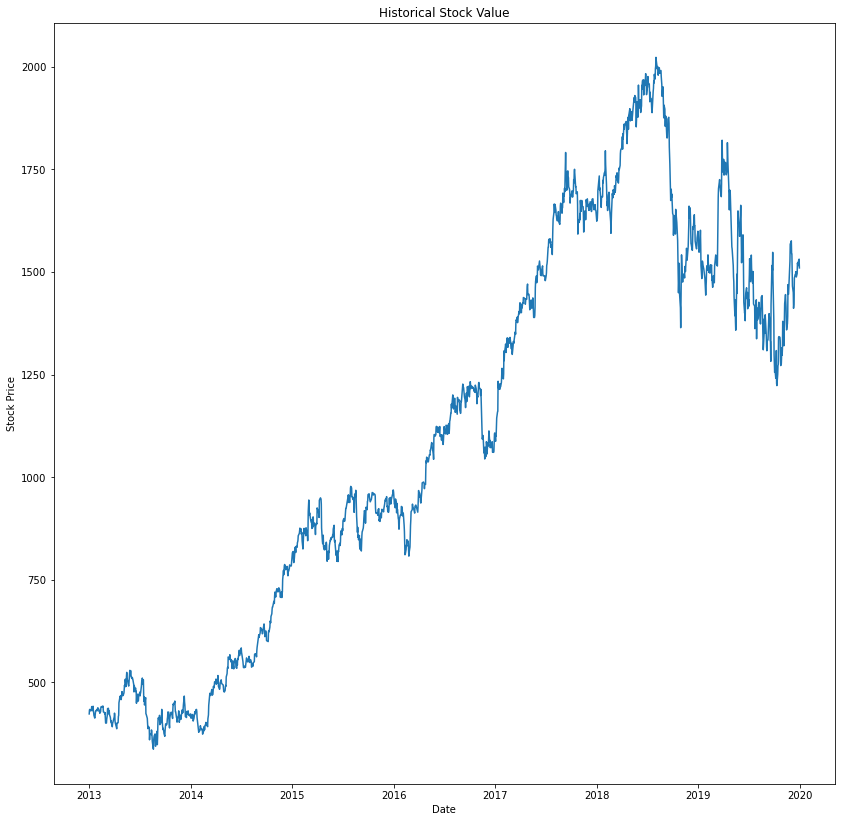

In [65]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [66]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [67]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1600):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [68]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [69]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 90, batch_size = 32)

Epoch 1/90
49/49 [==============================] - 10s 57ms/step - loss: 0.0291
Epoch 2/90
49/49 [==============================] - 3s 58ms/step - loss: 0.0046
Epoch 3/90
49/49 [==============================] - 3s 58ms/step - loss: 0.0042
Epoch 4/90
49/49 [==============================] - 3s 58ms/step - loss: 0.0039
Epoch 5/90
49/49 [==============================] - 3s 58ms/step - loss: 0.0046
Epoch 6/90
49/49 [==============================] - 3s 59ms/step - loss: 0.0038
Epoch 7/90
49/49 [==============================] - 3s 58ms/step - loss: 0.0034
Epoch 8/90
49/49 [==============================] - 3s 57ms/step - loss: 0.0037
Epoch 9/90
49/49 [==============================] - 3s 57ms/step - loss: 0.0033
Epoch 10/90
49/49 [==============================] - 3s 58ms/step - loss: 0.0031
Epoch 11/90
49/49 [==============================] - 3s 59ms/step - loss: 0.0032
Epoch 12/90
49/49 [==============================] - 3s 58ms/step - loss: 0.0035
Epoch 13/90
49/49 [=================

In [70]:
testdataframe= gh(symbol='INDUSINDBK',start=dt.datetime(2020,1,1),end=dt.datetime(2022,7,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 425):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [71]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

12/12 [==============================] - 2s 23ms/step


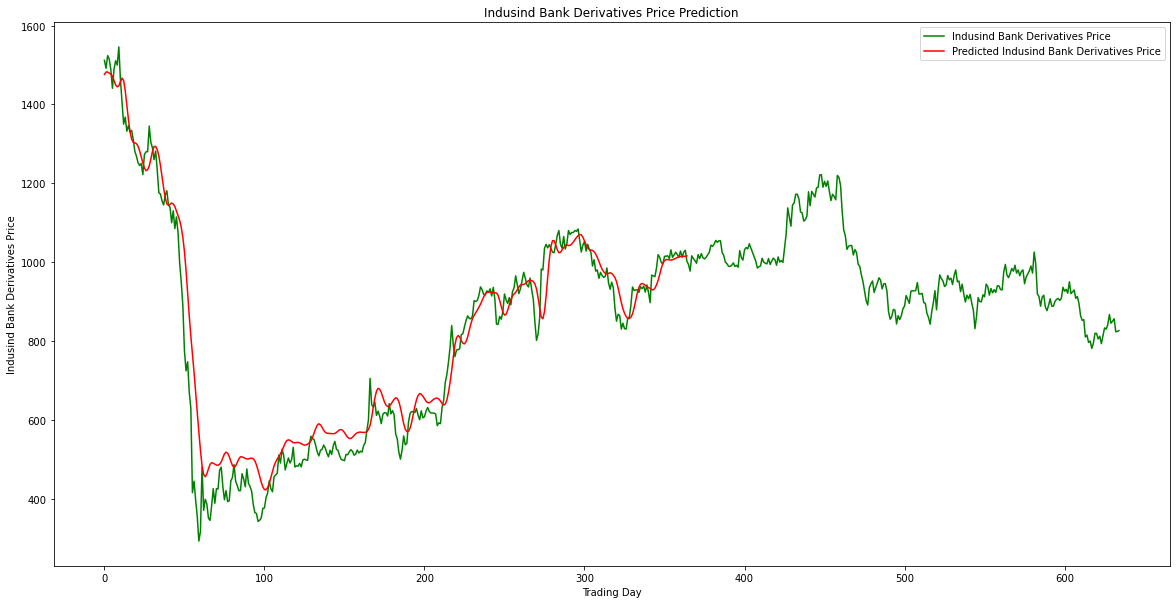

In [72]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Indusind Bank Derivatives Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Indusind Bank Derivatives Price')
plt.title('Indusind Bank Derivatives Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Indusind Bank Derivatives Price')
plt.legend()
plt.show()

## FEDERALBNK

In [75]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2019,12,31)
stk_data = gh(symbol='FEDERALBNK',start=start,end=end)

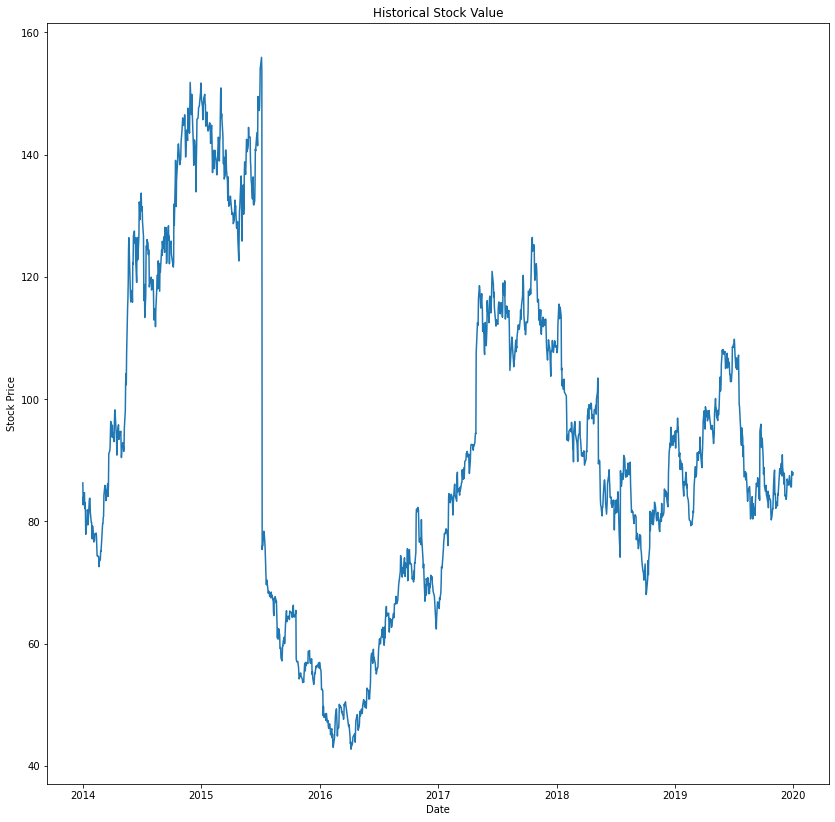

In [76]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [77]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [79]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1450):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [80]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [81]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
44/44 [==============================] - 10s 56ms/step - loss: 0.0354
Epoch 2/100
44/44 [==============================] - 2s 56ms/step - loss: 0.0095
Epoch 3/100
44/44 [==============================] - 2s 56ms/step - loss: 0.0086
Epoch 4/100
44/44 [==============================] - 2s 56ms/step - loss: 0.0076
Epoch 5/100
44/44 [==============================] - 3s 57ms/step - loss: 0.0075
Epoch 6/100
44/44 [==============================] - 3s 57ms/step - loss: 0.0078
Epoch 7/100
44/44 [==============================] - 3s 58ms/step - loss: 0.0073
Epoch 8/100
44/44 [==============================] - 2s 56ms/step - loss: 0.0066
Epoch 9/100
44/44 [==============================] - 2s 56ms/step - loss: 0.0066
Epoch 10/100
44/44 [==============================] - 2s 56ms/step - loss: 0.0065
Epoch 11/100
44/44 [==============================] - 3s 57ms/step - loss: 0.0054
Epoch 12/100
44/44 [==============================] - 3s 57ms/step - loss: 0.0060
Epoch 13/100
44/44 [====

In [82]:
testdataframe= gh(symbol='FEDERALBNK',start=dt.datetime(2020,1,1),end=dt.datetime(2022,7,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 450):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [83]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

13/13 [==============================] - 2s 23ms/step


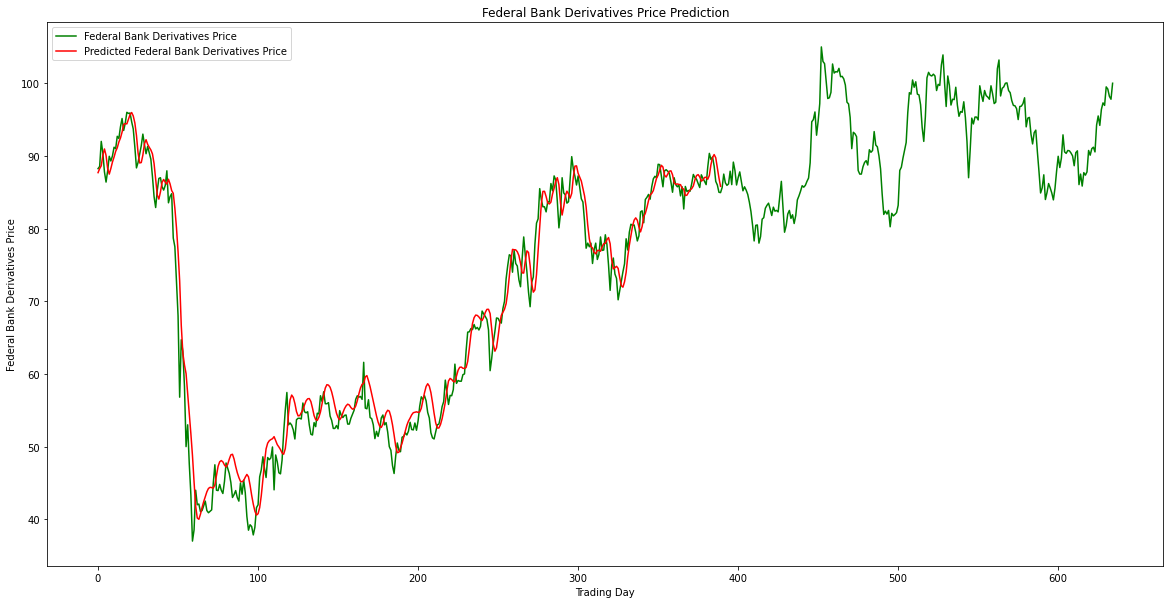

In [84]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Federal Bank Derivatives Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Federal Bank Derivatives Price')
plt.title('Federal Bank Derivatives Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Federal Bank Derivatives Price')
plt.legend()
plt.show()

Source for code - https://analyticsindiamag.com/hands-on-guide-to-lstm-recurrent-neural-network-for-stock-market-prediction/ 

Loss reduced and more accurate model than the source model which inspired us to take up this project